In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
def clean_data(df):

    '''
    Convert the column names to strings and set the column 'Area' as the index
    
    '''

    df.columns = df.columns.map(str)
    df.set_index('Area', inplace=True)

def remove_code_column(df):
    df.drop(['Code'], axis = 1, inplace = True)

def remove_code_row(df):
    df.drop(['Code'], inplace = True)

survivalrates = {}

# Read and clean sheets on survival rates
for i in range(2002, 2019):
    survivalrates[str(i)] = pd.read_excel('data/prepared_data.xlsx', sheet_name= str(i) + ' Survival Rates')
    clean_data(survivalrates[str(i)])

# Read and clean sheets on active enterprises
activeenterprises = pd.read_excel('data/prepared_data.xlsx', sheet_name= 'Active Enterprises by Year')
clean_data(activeenterprises)

# Read and clean sheets on death rates
deathrates = pd.read_excel('data/prepared_data.xlsx', sheet_name= 'Death Rates in % by Year')
clean_data(deathrates)

# Basic Statistics and Outliers
## Survival Rates
As there is a sheet for the survival rates of businesses created in each year for multiple years, we will analyse one and assume that the basic statistics of other sheets would be similar.


In [184]:
print(survivalrates['2002'].head(5))
print(survivalrates['2002'].describe())

                           Code  1 Year Survival in %  2 Year Survival in %  \
Area                                                                          
City of London        E09000001                  89.5                  79.9   
Barking and Dagenham  E09000002                  94.3                  77.0   
Barnet                E09000003                  93.8                  77.5   
Bexley                E09000004                  92.8                  77.8   
Brent                 E09000005                  93.6                  69.4   

                      3 Year Survival in %  4 Year Survival in %  \
Area                                                               
City of London                        66.4                  57.6   
Barking and Dagenham                  57.5                  47.1   
Barnet                                55.4                  44.2   
Bexley                                61.4                  50.3   
Brent                                 

It is expected that the mean of each column will decrease because survival rates of businesses decrease as we measure longer periods. To get a better visualisation of the data, we will do a simple line graph of the 1, 2, 3, 4 and 5 year survival rates of businesses that started in 2002.

Area                 City of London Barking and Dagenham Barnet Bexley Brent  \
1 Year Survival in %           89.5                 94.3   93.8   92.8  93.6   
2 Year Survival in %           79.9                   77   77.5   77.8  69.4   
3 Year Survival in %           66.4                 57.5   55.4   61.4  49.5   
4 Year Survival in %           57.6                 47.1   44.2   50.3  38.2   
5 Year Survival in %           52.4                 40.2   36.7   42.5  32.1   

Area                 Bromley Camden Croydon Ealing Enfield  ... Merton Newham  \
1 Year Survival in %    93.4     93    93.2   93.8    92.3  ...     93   93.3   
2 Year Survival in %    80.1   76.2    77.4   74.6    77.4  ...   71.9   73.2   
3 Year Survival in %    64.5   57.6    57.7   57.5    58.5  ...   52.6   52.4   
4 Year Survival in %      52   46.9      47   46.8    47.9  ...     39   39.6   
5 Year Survival in %    44.1   40.5    40.1   40.8    39.7  ...   33.3   32.3   

Area                 Redbridge R

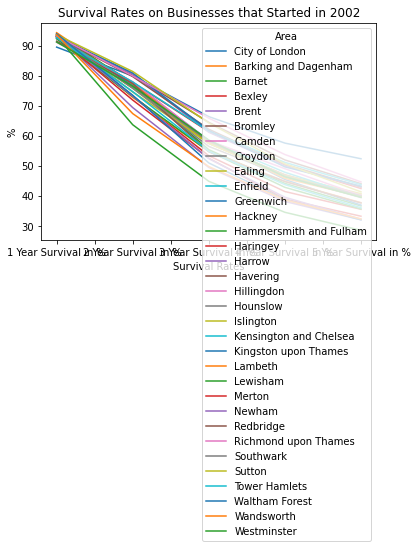

In [185]:
# Transpose the dataframe so that it can be plotted
survivalrates_transposed = survivalrates['2002'].transpose()

# Remove the row for 'Code' as it is not numeric
remove_code_row(survivalrates_transposed)

print(survivalrates_transposed.head(5))

# Plot the transposed dataframe for all boroughts
survivalrates_transposed.plot()
plt.title('Survival Rates on Businesses that Started in 2002')
plt.xlabel('Survival Rates')
plt.ylabel('%')
plt.savefig('charts/survival_rates_2002.png')


From the line graph it is also observed that there are no obivous outliers.

As this is just exploring the data, the chart is messy. During the data visualisation stage, line graphs for all years for all boroughs will be created. The client would be able to choose the borough and then view the graph for each year in a slideshow feature. This would enable them to see whether there is a steep trend of survival rates, which would shed light on the difficulty of surviving from one year to another.

## Active Enterprises

In [186]:
print(activeenterprises.head(5))

                           Code   2002   2003   2004   2005   2006   2007  \
Area                                                                        
City of London        E09000001  12715  12150  11980  11970  12240  12615   
Barking and Dagenham  E09000002   3435   3470   3120   3190   3280   3455   
Barnet                E09000003  17705  17525  19655  19095  18565  18555   
Bexley                E09000004   6455   6530   6450   6560   6710   6835   
Brent                 E09000005  11670  11800  11295  11250  11330  11750   

                       2008   2009   2010   2011   2012   2013   2014   2015  \
Area                                                                           
City of London        13800  14895  15830  16250  16765  17775  19250  26130   
Barking and Dagenham   3740   3895   4190   4280   4580   5055   5690   6560   
Barnet                19360  19920  20665  21205  22110  23135  24555  26190   
Bexley                 6920   6900   7165   7245   7390   78

From looking at the data, it makes more sense to view the descriptions of the data by the borough. This is because the number of active enterprsies varies greatly by the borough, but less so throughout the years.

Area   City of London  Barking and Dagenham        Barnet        Bexley  \
count       18.000000             18.000000     18.000000     18.000000   
mean     18919.722222           5010.000000  22487.500000   7848.333333   
std       7761.188598           1907.541535   4322.555157   1462.643658   
min      11970.000000           3120.000000  17525.000000   6450.000000   
25%      12640.000000           3458.750000  19161.250000   6741.250000   
50%      16040.000000           4235.000000  20935.000000   7205.000000   
75%      24410.000000           6342.500000  25781.250000   8913.750000   
max      32990.000000           8515.000000  29845.000000  10385.000000   

Area          Brent       Bromley        Camden       Croydon        Ealing  \
count     18.000000     18.000000     18.000000     18.000000     18.000000   
mean   13799.166667  13933.333333  28018.888889  13519.722222  15887.777778   
std     2565.965734   2289.678888   5914.851834   2367.388405   3041.381856   
min    1

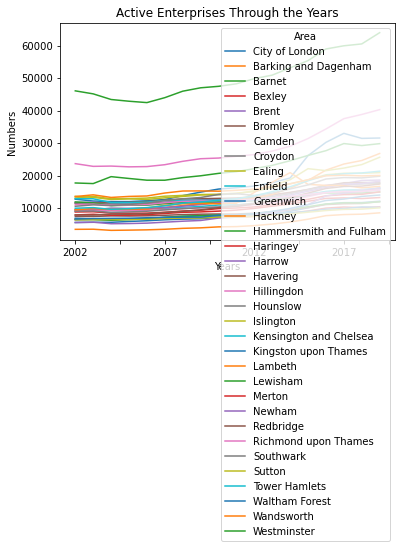

In [187]:
# Transpose the dataframe
activeenterprises_transposed = activeenterprises.transpose()

# Remove the row for 'Code' as it is not numeric
remove_code_row(activeenterprises_transposed)

activeenterprises_transposed = activeenterprises_transposed.astype(int)

# Plot the transposed dataframe for all boroughs
activeenterprises_transposed.plot()
plt.title('Active Enterprises Through the Years')
plt.xlabel('Years')
plt.ylabel('Numbers')
plt.savefig('charts/active_enterprises.png')

print(activeenterprises_transposed.describe())



From the graph, it is observed that during the earlier years there was a decrease in the number of active enterprises in some boroughs, but generally, there is an increase in the number of active enterprises meaning that birth rates are greater than death rates. There are also no obvious outliers.

In the future, individual line graphs will be created for the client to view each one separately. 

## Death Rates

In [188]:
print(deathrates)

                             Code  2004  2005  2006  2007  2008  2009  2010  \
Area                                                                          
City of London          E09000001   9.7   8.4   7.7  13.5   7.9   9.2   9.1   
Barking and Dagenham    E09000002  13.1  12.4  10.5  10.4  11.2  14.8  14.0   
Barnet                  E09000003  15.3  14.0  12.5  14.3  12.1  15.0  13.5   
Bexley                  E09000004  12.4  11.5  10.9  10.2  10.7  12.7  11.8   
Brent                   E09000005  15.4  13.3  11.7  11.6  11.0  14.4  11.2   
Bromley                 E09000006  11.8  11.1  10.1   9.7   9.7  13.5  10.9   
Camden                  E09000007  12.1  10.5   9.4  11.4   9.0  12.1  10.4   
Croydon                 E09000008  14.1  12.0  11.1  11.6  10.4  13.5  11.9   
Ealing                  E09000009  13.9  12.7  11.1  10.7  10.8  13.7  11.3   
Enfield                 E09000010  12.9  12.0  11.7  12.3  10.9  15.0  13.1   
Greenwich               E09000011  13.3  12.3  11.4 

From briefly looking at the data, the death rates do not seem to vary much between different boroughs and years. To get a better understanding of the data, we will view it in a boxplot.

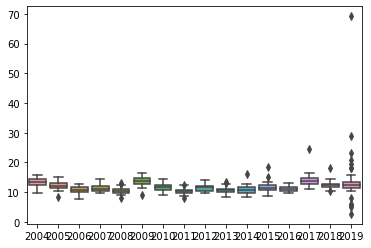

In [189]:
remove_code_column(deathrates)

sns.boxplot(data=deathrates).get_figure().savefig('charts/boxplot_deathrates.png')

From the boxplot, several years have outliers, but the year 2019 has more outliers and more extreme outliers. As this data is from 2019, it could be that the data for 2019 is not the most accurate. Thus the data for the year 2019 will be removed.

In [190]:
deathrates.drop(['2019'], axis = 1, inplace = True)

print(deathrates)

                        2004  2005  2006  2007  2008  2009  2010  2011  2012  \
Area                                                                           
City of London           9.7   8.4   7.7  13.5   7.9   9.2   9.1   9.8   9.9   
Barking and Dagenham    13.1  12.4  10.5  10.4  11.2  14.8  14.0  10.6  12.2   
Barnet                  15.3  14.0  12.5  14.3  12.1  15.0  13.5  12.5  13.7   
Bexley                  12.4  11.5  10.9  10.2  10.7  12.7  11.8   9.9  11.8   
Brent                   15.4  13.3  11.7  11.6  11.0  14.4  11.2  10.5  11.7   
Bromley                 11.8  11.1  10.1   9.7   9.7  13.5  10.9   9.6  10.5   
Camden                  12.1  10.5   9.4  11.4   9.0  12.1  10.4   9.4  10.9   
Croydon                 14.1  12.0  11.1  11.6  10.4  13.5  11.9  10.8  12.1   
Ealing                  13.9  12.7  11.1  10.7  10.8  13.7  11.3  10.0  11.1   
Enfield                 12.9  12.0  11.7  12.3  10.9  15.0  13.1  11.7  12.7   
Greenwich               13.3  12.3  11.4

# Problem 1: Are there any general trends with regard to 5-year survival rates?
As we're interested in analysing the 5-year survival rates, we will create a dataframe with just that data for multiple years. As the available data is only up to year 2019, there is only data of the 5-year survival rates up to year 2014.

In [191]:
# Create a list and append Code and Area
five_year_survival_rate_list = []
five_year_survival_rate_list.append(list(survivalrates['2002'].index))
five_year_survival_rate_list.append(list(survivalrates['2002']['Code']))

# Append the relevant 5 year survival rates for businesses created in various years
for i in range (2002, 2015):
    five_year_survival_rate_list.append(list(survivalrates[str(i)]['5 Year Survival in %']))

# Transpose and read the dataframe
five_year_survival_rate_df = pd.DataFrame(five_year_survival_rate_list).transpose()

# Set the column names
five_year_survival_rate_df.columns=['Area', 'Code', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']

print(five_year_survival_rate_df)

                      Area       Code  2002  2003  2004  2005  2006  2007  \
0           City of London  E09000001  52.4  52.7  52.8  43.3  50.2  49.8   
1     Barking and Dagenham  E09000002  40.2  39.1  38.5  33.9  39.2  38.2   
2                   Barnet  E09000003  36.7  38.2  39.4  42.4  42.1  42.5   
3                   Bexley  E09000004  42.5  43.6  44.1  45.4  45.8  43.1   
4                    Brent  E09000005  32.1    34  38.6    40    38  39.7   
5                  Bromley  E09000006  44.1  46.1  46.9  42.4  44.9  43.7   
6                   Camden  E09000007  40.5  41.9  47.5  43.1  42.7  43.4   
7                  Croydon  E09000008  40.1  41.3  42.9  42.1  38.6  41.4   
8                   Ealing  E09000009  40.8  35.1  38.8  37.3  40.8  38.6   
9                  Enfield  E09000010  39.7  41.9  42.9    39  39.7  41.6   
10               Greenwich  E09000011    37  39.7    40  40.6  39.9  39.7   
11                 Hackney  E09000012  39.8    43  44.3  42.5  43.2  46.1   

Cleaning the data.

In [192]:
# Drop unnessary columns
remove_code_column(five_year_survival_rate_df)

# Clean the data
clean_data(five_year_survival_rate_df)

print(five_year_survival_rate_df.info(verbose=True))

for i in range(2002, 2015):
    five_year_survival_rate_df[str(i)] = five_year_survival_rate_df[str(i)].astype(float)

print(five_year_survival_rate_df)


<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, City of London to Westminster
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2002    33 non-null     object
 1   2003    33 non-null     object
 2   2004    33 non-null     object
 3   2005    33 non-null     object
 4   2006    33 non-null     object
 5   2007    33 non-null     object
 6   2008    33 non-null     object
 7   2009    33 non-null     object
 8   2010    33 non-null     object
 9   2011    33 non-null     object
 10  2012    33 non-null     object
 11  2013    33 non-null     object
 12  2014    33 non-null     object
dtypes: object(13)
memory usage: 3.6+ KB
None
                        2002  2003  2004  2005  2006  2007  2008  2009  2010  \
Area                                                                           
City of London          52.4  52.7  52.8  43.3  50.2  49.8  33.2  36.3  39.3   
Barking and Dagenham    40.2  39.1  38.5  33.9  39.2  

Now we will create a box plot to view the spread of the 5-year survival rates for each year to analyse the general trend of these rates, which is one of our business question. It also helps us to find if there are any outliers in the data. 

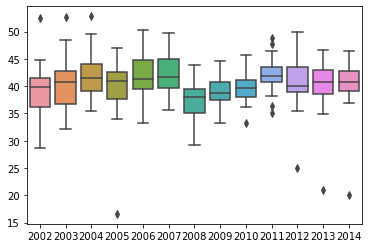

In [193]:
# View boxplot and save as an image
sns.boxplot(data=five_year_survival_rate_df).get_figure().savefig('charts/boxplot.png')

From the boxplot, we observe that there is no general trend with regard to 5-year survival rates as the interquartile range and median for all years do not vary signicantly. An exception would be the 5-year survival rates for businesses created in 2008, but could be due to the 2008 financial crisis.

We also analyse that there are some outliers that were not picked up earlier as only the graph for the year 2002 was analysed. To check if these outliers should be removed, we will analyse the extreme outliers in year 2005, 2012, 2013 and 2014.

In [194]:
print(five_year_survival_rate_df.loc[five_year_survival_rate_df['2005'] < 25])
print(five_year_survival_rate_df.loc[five_year_survival_rate_df['2012'] < 30])
print(five_year_survival_rate_df.loc[five_year_survival_rate_df['2013'] < 30])
print(five_year_survival_rate_df.loc[five_year_survival_rate_df['2014'] < 30])

        2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
Area                                                                       
Newham  32.3  36.8  37.3  16.6  35.0  36.2  29.2  35.0  33.3  36.4  36.8   

        2013  2014  
Area                
Newham  34.9  37.0  
         2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
Area                                                                        
Lambeth  37.8  35.4  39.2  39.0  39.1  39.6  34.8  38.8  42.1  41.4  25.0   

         2013  2014  
Area                 
Lambeth  20.9  20.1  
         2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
Area                                                                        
Lambeth  37.8  35.4  39.2  39.0  39.1  39.6  34.8  38.8  42.1  41.4  25.0   

         2013  2014  
Area                 
Lambeth  20.9  20.1  
         2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
Area                               

To analyse this further, it would be good to plot the other survival rates of this area.

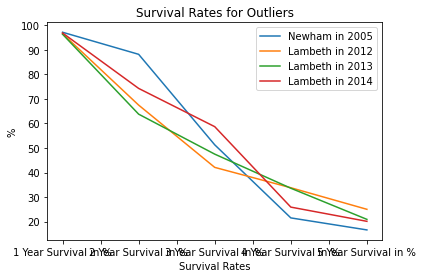

<Figure size 432x288 with 0 Axes>

In [195]:
# Remove 'Code'
for year in [2005, 2012, 2013, 2014]:
    remove_code_column(survivalrates[str(year)])

survivalrates['2005'].loc['Newham'].plot(label = 'Newham in 2005')
survivalrates['2012'].loc['Lambeth'].plot(label = 'Lambeth in 2012')
survivalrates['2013'].loc['Lambeth'].plot(label = 'Lambeth in 2013')
survivalrates['2014'].loc['Lambeth'].plot(label = 'Lambeth in 2014')
plt.title('Survival Rates for Outliers')
plt.xlabel('Survival Rates')
plt.ylabel('%')
plt.legend()
plt.show()
plt.savefig('charts/survival_rates_outliers.png')

As it seems that the data is just an extreme value, it will not be removed.

# Problem 2: Based on data on past years, which borough has the best 5-year survival rate?

As we are trying to find the borough with the best 5-year survival rate, we will calculate the average 5 year survival rate for each borough. We will also save this dataframe with the new column with the averages as a separate sheets in the Excel file for future use.

In [196]:
five_year_survival_rate_df['mean'] = five_year_survival_rate_df.iloc[:, 1:14].mean(axis=1)

# Add a new sheet to the existing file
with pd.ExcelWriter('data/prepared_data.xlsx',
                    mode = 'a', engine='openpyxl') as writer:  
    five_year_survival_rate_df.to_excel(writer, sheet_name='5-Year Survival Rates')

To see the averages of all boroughs and identify the one with the highest average, we will view this data on a barchart.

Borough with the highest 5-year survival rate is Sutton with a survival rate of 46%


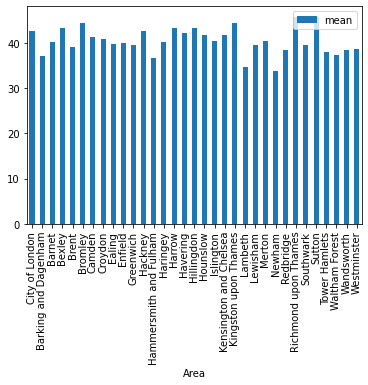

In [197]:
# View the 5-year survival rate average for each borough
five_year_survival_rate_df.plot.bar(y='mean')

# Identify the borough with the highest average
max = five_year_survival_rate_df['mean'].idxmax()
print('Borough with the highest 5-year survival rate is ' + str(max) + ' with a survival rate of ' + str(round(five_year_survival_rate_df['mean'].max())) + '%')

Thus, we identify that Sutton has the highest 5-year survival rate based on past data. 

# Problem 3: Which boroughs have the highest economic activity, indicated by the number of active enterprises?

Next, we will look at the number of active enterprises in each area. To get a better idea of the current economic situtation in each borough, we will use data from the most recent year available in the dataset (year 2019), to find the borough with the highest number of active enterprises.

Borough with the highest number of active enterprises in 2019 is Westminster with 63980 enterprises


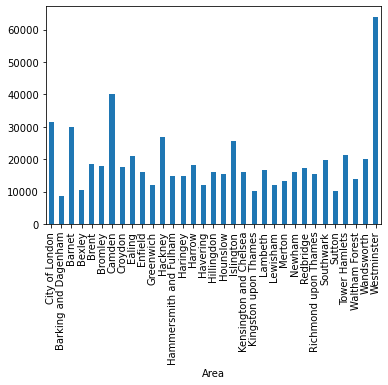

In [198]:
activeenterprises_2019 = activeenterprises['2019'].copy()
activeenterprises_2019.plot.bar()

# Identify the borough with the highest average
max = activeenterprises_2019.idxmax()
print('Borough with the highest number of active enterprises in 2019 is ' + str(max) + ' with ' + str(activeenterprises_2019.max()) + ' enterprises')

# Problem 4: Which boroughs have the lowest death rates?
Finally, we will look at the average death rates. Like survival rates, death rates don't vary much year on year so we will take the averages of the years available to find the boroughs with the lowest death rates.

In [199]:
deathrates['mean'] = deathrates.iloc[:, 1:14].mean(axis = 1)

# Replace the old sheet with the new sheet without outliers and with a column with the average
with pd.ExcelWriter('data/prepared_data.xlsx',
                    mode = 'a', engine='openpyxl') as writer:  
    deathrates.to_excel(writer, sheet_name='Death Rates in % by Year')

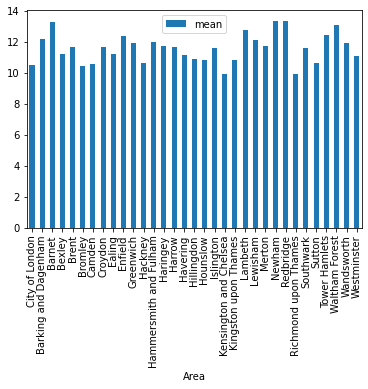

In [200]:
deathrates['mean'].plot.bar()

plt.legend()

To better understand the economic situation of each borough, the data on the number of active enterprises and death rates should both be visualised on a multivariate map. This is to get a better idea of the boroughs with a high number of active enterprises and a low death rate. 